# SIFT

SIFT stands for Scale Invariant Feature Transform, it is a feature extraction method (among others, such as HOG feature extraction) where image content is transformed into local feature coordinates that are invariant to translation, scale and other image transformations.

In [25]:
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import font_manager
import cv2 
import numpy as np

font_path = '../assets/Q-04LITE-Regular.ttf'
font_manager.fontManager.addfont(font_path)
prop = font_manager.FontProperties(fname=font_path)

rc_params = {
    'axes.titlesize': 10,
    'axes.labelsize': 10,
    'xtick.labelsize': 9,
    'ytick.labelsize': 9,
    'legend.fontsize': 10,
    'figure.figsize': (6, 4),
    'font.weight': 'bold',
    'font.family': 'sans-serif',
    'font.sans-serif': prop.get_name(),
    'axes.labelweight': 'bold',
}

plt.rcParams.update(rc_params)

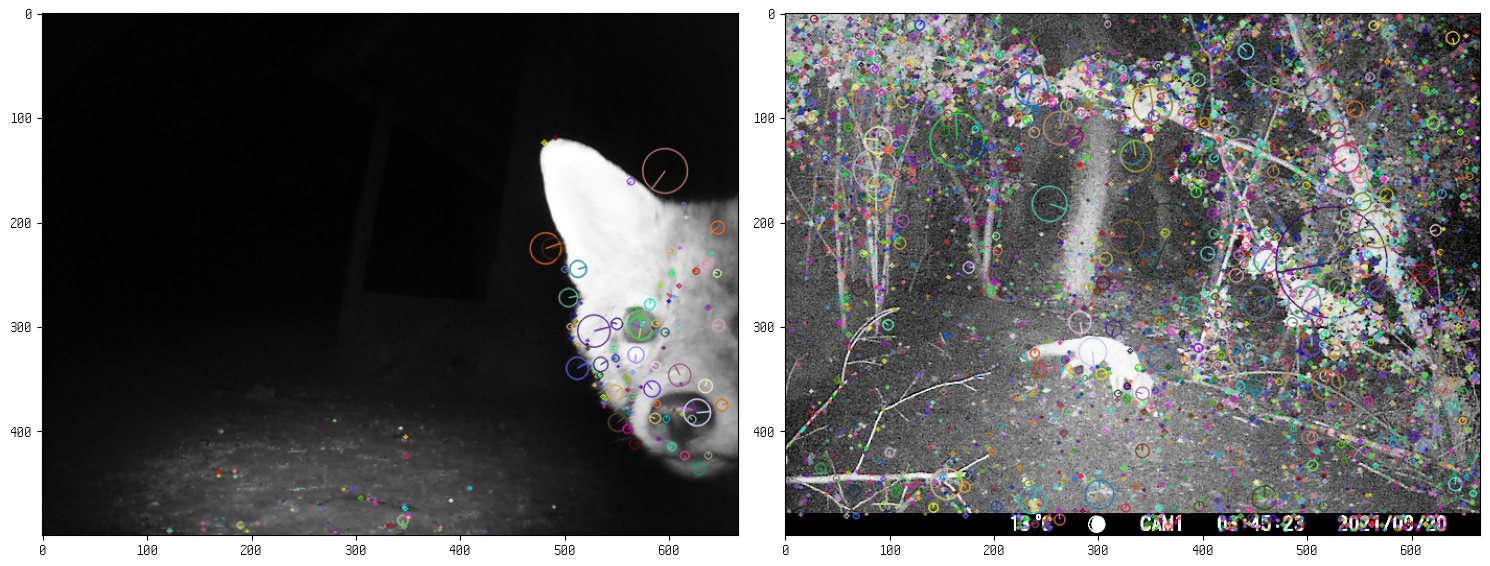

In [51]:
img1 = cv2.imread('../assets/fox.jpg')  
img2 = cv2.imread('../assets/fox-2.png')  

img2 = cv2.resize(img2, (img1.shape[1], img1.shape[0]))
img1 = cv2.resize(img1, (img1.shape[1]//6, img1.shape[0]//6))
img2 = cv2.resize(img2, (img2.shape[1]//6, img2.shape[0]//6))

gray1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
gray2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)

sift = cv2.xfeatures2d.SIFT_create()
keypoints_1, _ = sift.detectAndCompute(gray1, None)
keypoints_2, _ = sift.detectAndCompute(gray2, None)

img1_kp = cv2.drawKeypoints(
    img1, keypoints_1, None,
    flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS,
)
img2_kp = cv2.drawKeypoints(
    img2, keypoints_2, None,
    flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS,
)

plt.subplots(1, 2, figsize=(15, 6))

plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(img1_kp, cv2.COLOR_BGR2RGB))

plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(img2_kp, cv2.COLOR_BGR2RGB))

plt.tight_layout()
plt.savefig('../assets/sift-keypoints.svg', format='svg', bbox_inches='tight')
plt.show()


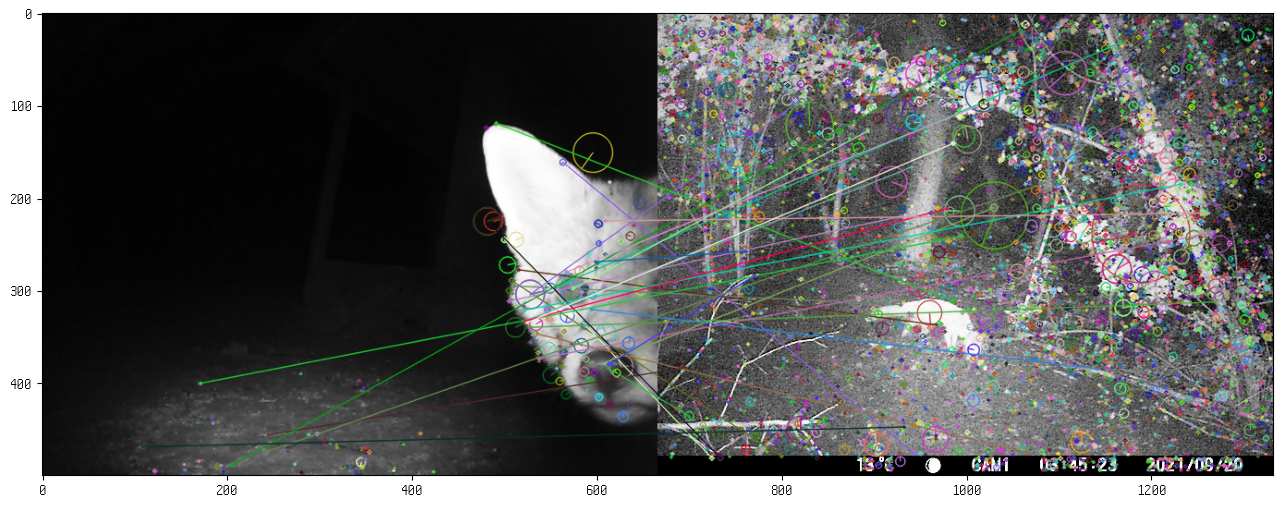

In [50]:
img1 = cv2.imread('../assets/fox.jpg')  
img2 = cv2.imread('../assets/fox-2.png')  

img2 = cv2.resize(img2, (img1.shape[1], img1.shape[0]))
img1 = cv2.resize(img1, (img1.shape[1]//6, img1.shape[0]//6))
img2 = cv2.resize(img2, (img2.shape[1]//6, img2.shape[0]//6))

img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)

sift = cv2.xfeatures2d.SIFT_create()
keypoints_1, descriptors_1 = sift.detectAndCompute(img1,None)
keypoints_2, descriptors_2 = sift.detectAndCompute(img2,None)

bf = cv2.BFMatcher(cv2.NORM_L1, crossCheck=True)
matches = bf.match(descriptors_1,descriptors_2)

matches = sorted(matches, key = lambda x:x.distance)
matched_img = cv2.drawMatches(img1, keypoints_1, img2, keypoints_2, matches[:30], img2, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

plt.subplots(1,1, figsize=(20, 6))
plt.imshow(cv2.cvtColor(matched_img, cv2.COLOR_BGR2RGB))
plt.savefig('../assets/sift-matches.svg', format='svg', bbox_inches='tight')